# Preprocessing Workflow


🎯 This exercise will take you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

👇 Download the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) and save it in the `data` folder as `ML_Houses_dataset.csv`. Then, run the code below to load the dataset and features you will be working with.

In [50]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv")

data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']].copy()

data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500


👉 Take the time to do a preliminary investigation of the features by reading the dataset description available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to use refer to it throughout the day.

# Duplicates

ℹ️ Duplicates in datasets can cause data leakage. It is important to locate and remove any meaningless duplicates.

❓ How many duplicated rows are there in the dataset? Save your answer under variable name `duplicate_count`.

In [51]:
len(data)

1760

In [52]:
duplicate_count = data.duplicated().sum()
duplicate_count

300

👇 Remove the duplicates from the dataset. Overwite the dataframe `data`.

In [53]:
data = data.drop_duplicates()

In [54]:
len(data)

1460

# Missing data

👇 Print out the percentage of missing values for all columns of the dataframe.

In [56]:
data.isnull().sum().sort_values(ascending=False)/len(data)

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

## `GarageFinish`

👇 Investigate the missing values in `GarageFinish`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [57]:
data["GarageFinish"].unique()
data["GarageFinish"].fillna('unknown',inplace=True)

In [58]:
data["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', 'unknown'], dtype=object)

## `RoofSurface`

👇 Investigate the missing values in `RoofSurface`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1460 non-null   int64  
 1   BedroomAbvGr  1460 non-null   int64  
 2   KitchenAbvGr  1460 non-null   int64  
 3   OverallCond   1460 non-null   int64  
 4   RoofSurface   1451 non-null   float64
 5   GarageFinish  1460 non-null   object 
 6   CentralAir    1460 non-null   object 
 7   ChimneyStyle  1460 non-null   object 
 8   MoSold        1460 non-null   int64  
 9   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 125.5+ KB


In [60]:
data["RoofSurface"].unique

<bound method Series.unique of 0       1995.0
1        874.0
2       1593.0
3       2566.0
4       3130.0
         ...  
1455    1698.0
1456    2645.0
1457     722.0
1458    3501.0
1459    3082.0
Name: RoofSurface, Length: 1460, dtype: float64>

In [61]:
data["RoofSurface"].astype(float)

0       1995.0
1        874.0
2       1593.0
3       2566.0
4       3130.0
         ...  
1455    1698.0
1456    2645.0
1457     722.0
1458    3501.0
1459    3082.0
Name: RoofSurface, Length: 1460, dtype: float64

In [62]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice
imputer.fit(data[['RoofSurface']]) # Call the "fit" method on the object
data['RoofSurface'] = imputer.transform(data[['RoofSurface']]) # Call the "transform" method on the object
imputer.statistics_ # The mean is stored in the transformer's memory

array([2906.])

👇 When you are done, print out the percentage of missing values for the entire dataframe.

In [63]:
(data.isnull().sum()/len(data))*100

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
ChimneyStyle    0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

In [64]:
l = ["?", "Null", "NULL", "missing", "-", "Infinity"]
m = data.isin(l).any()
m

GrLivArea       False
BedroomAbvGr    False
KitchenAbvGr    False
OverallCond     False
RoofSurface     False
GarageFinish    False
CentralAir      False
ChimneyStyle     True
MoSold          False
SalePrice       False
dtype: bool

In [65]:
data["ChimneyStyle"].nunique()/len(data)

0.002054794520547945

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1460 non-null   int64  
 1   BedroomAbvGr  1460 non-null   int64  
 2   KitchenAbvGr  1460 non-null   int64  
 3   OverallCond   1460 non-null   int64  
 4   RoofSurface   1460 non-null   float64
 5   GarageFinish  1460 non-null   object 
 6   CentralAir    1460 non-null   object 
 7   ChimneyStyle  1460 non-null   object 
 8   MoSold        1460 non-null   int64  
 9   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 125.5+ KB


In [67]:
data["CentralAir"].unique()

array(['Y', 'N'], dtype=object)

In [68]:
data["ChimneyStyle"].unique()

array(['bricks', 'castiron', '?'], dtype=object)

In [69]:
data.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'RoofSurface', 'GarageFinish', 'CentralAir', 'ChimneyStyle', 'MoSold',
       'SalePrice'],
      dtype='object')

⚠️ Be careful: not all missing values are represented `np.nans`, and python's `isnull()` only detects `np.nans` ⚠️

## `ChimneyStyle`

👇 Investigate the missing values in `ChimneyStyle`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
</details>

In [70]:
data["ChimneyStyle"].unique()

array(['bricks', 'castiron', '?'], dtype=object)

In [71]:
data["ChimneyStyle"].replace("?", np.nan, inplace = True)

In [72]:
data["ChimneyStyle"].unique

<bound method Series.unique of 0         bricks
1         bricks
2       castiron
3       castiron
4         bricks
          ...   
1455         NaN
1456         NaN
1457         NaN
1458         NaN
1459         NaN
Name: ChimneyStyle, Length: 1460, dtype: object>

In [73]:
data["ChimneyStyle"].isnull().sum()/len(data)

0.9965753424657534

In [74]:
data.drop(columns=['ChimneyStyle'], inplace = True)


In [75]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,2,208500
1,1262,3,1,8,874.0,RFn,Y,5,181500
2,1786,3,1,5,1593.0,RFn,Y,9,223500
3,1717,3,1,5,2566.0,Unf,Y,2,140000
4,2198,4,1,5,3130.0,RFn,Y,12,250000


# Scaling

##  `RoofSurface` 

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

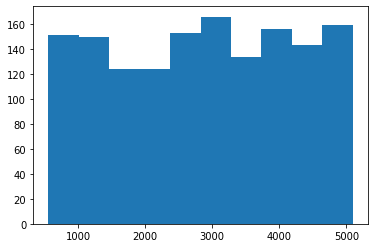

In [77]:
import matplotlib.pyplot as plt
plt.hist(data['RoofSurface']);

<details>
    <summary>💡 Hint</summary>
ℹ️ Since `RoofSurface` does not seem to have a normal distribution, it is better to MinMax scale.
</details>

In [78]:
from sklearn.preprocessing import RobustScaler
min_max_scaler = MinMaxScaler() # Instanciate Robust Scaler
min_max_scaler.fit(data[['RoofSurface']]) # Fit scaler to feature
data['RoofSurface'] = min_max_scaler.transform(data[['RoofSurface']]) #Scale
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000


## `GrLivArea`

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

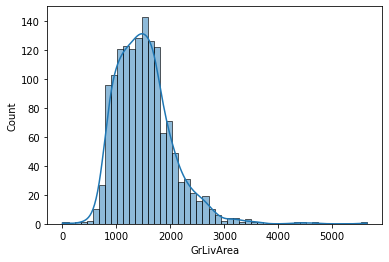

In [79]:
import seaborn as sns
sns.histplot(data['GrLivArea'], kde = True);

<details>
    <summary>💡 Hint</summary>
ℹ️ `GrLivArea` has a normal distribution, and some outliers. It needs to be Robust scaled.
</details>

In [80]:
r_scaler2 = RobustScaler() # Instanciate Robust Scaler
r_scaler2.fit(data[['GrLivArea']]) # Fit scaler to feature
data['GrLivArea'] = r_scaler2.transform(data[['GrLivArea']]) #Scale
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312090,3,1,8,0.069650,RFn,Y,5,181500
2,0.497489,3,1,5,0.228124,RFn,Y,9,223500
3,0.390885,3,1,5,0.442583,Unf,Y,2,140000
4,1.134029,4,1,5,0.566894,RFn,Y,12,250000


## `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scale
2. Standard Scale
3. Robust Scale

Replace the original columns by the transformed values.

<details>
    <summary>💡 Hint</summary>
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features that can be MinMax scaled.
</details>

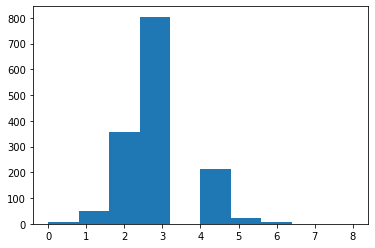

In [81]:
plt.hist(data["BedroomAbvGr"]);

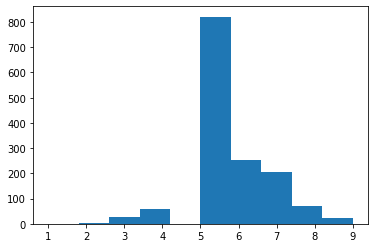

In [82]:
plt.hist(data["OverallCond"]);

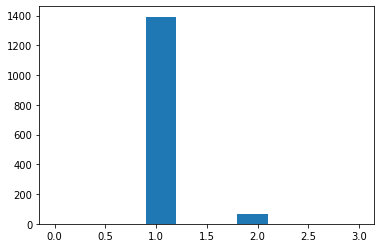

In [83]:
plt.hist(data["KitchenAbvGr"]);

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler1.fit(data[['BedroomAbvGr']])
data['BedroomAbvGr'] = scaler1.transform(data[['BedroomAbvGr']])

In [85]:
scaler2 = MinMaxScaler()
scaler2.fit(data[['OverallCond']])
data['OverallCond'] = scaler2.transform(data[['OverallCond']])
data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,0.375,1,0.500,0.316729,RFn,Y,2,208500
1,-0.312090,0.375,1,0.875,0.069650,RFn,Y,5,181500
2,0.497489,0.375,1,0.500,0.228124,RFn,Y,9,223500


In [86]:
scaler3 = MinMaxScaler()
scaler3.fit(data[['KitchenAbvGr']])
data['KitchenAbvGr'] = scaler3.transform(data[['KitchenAbvGr']])

In [87]:
data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500


### ☑️ Test your code

In [88]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 3 items

tests/test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED [ 33%]
tests/test_scaling.py::TestScaling::test_gr_liv_area PASSED              [ 66%]
tests/test_scaling.py::TestScaling::test_roof_surface PASSED             [100%]

============================== 3 passed in 0.24s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# Feature Engineering

## `GarageFinish`

👇 Investigate `GarageFinish` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 Hint</summary>
ℹ️ `GarageFinish` is a multicategorical feature that must be One hot encoded.
</details>

In [89]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data.GarageFinish.unique() # Check unique values for streets (3)
ohe = OneHotEncoder(sparse = False) # Instanciate encoder
ohe.fit(data[['GarageFinish']]) # Fit encoder
garage_encoded = ohe.transform(data[['GarageFinish']]) # Encode garage
garage_encoded

data["garage_finished"],data["rough_finished"],data['garage_unfinished'], data["no_garage"] = garage_encoded.T
data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice,garage_finished,rough_finished,garage_unfinished,no_garage
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500,0.0,1.0,0.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500,0.0,1.0,0.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500,0.0,1.0,0.0,0.0


In [90]:
data.drop(columns=['GarageFinish'], inplace = True)


In [91]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,garage_finished,rough_finished,garage_unfinished,no_garage
0,0.380070,0.375,0.333333,0.500,0.316729,Y,2,208500,0.0,1.0,0.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,Y,5,181500,0.0,1.0,0.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,Y,9,223500,0.0,1.0,0.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Y,2,140000,0.0,0.0,1.0,0.0
4,1.134029,0.500,0.333333,0.500,0.566894,Y,12,250000,0.0,1.0,0.0,0.0


## Encoding  `CentralAir`

👇 Investigate `CentralAir` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column by the encoding.


<details>
    <summary>💡 Hint</summary>
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [92]:
data["CentralAir"].unique()

array(['Y', 'N'], dtype=object)

In [93]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instanciate encoder for binary feature
ohe.fit(data[['CentralAir']]) # Fit encoder
data['CentralAir'] = ohe.transform(data[['CentralAir']]) # Encode Street
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,garage_finished,rough_finished,garage_unfinished,no_garage
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,1.0,0.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,1.0,0.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,9,223500,0.0,1.0,0.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,2,140000,0.0,0.0,1.0,0.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,12,250000,0.0,1.0,0.0,0.0


## `MoSold` - Cyclical engineering 

Data can be continuous, discrete, categorical, ordinal, but it can also be cyclical. Temporal data is a prime example of that: months, days, minutes. Such data needs specific preprocessing for Machine Learning models to understand and consider its cyclical nature.

Consider the feature `MoSold`, the month on which the house was sold. If left as is, a model would not understand that after 12 (December) comes 1 (January). It would only consider the values on a linear scale.

👇 Do your own investigation on how to preprocess cyclical features in Machine Learning. Then, transform `MoSold` according to your findings.

⚠️ Replace the original column by the new features.

<details>
    <summary>💡 Hint</summary>
ℹ️ This <a href='https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time' target='blank'>article</a> explains how to deal with cyclical features.
    
</details>

**❓ How would you name these 2 new features?**

Let's add two new columns to your data frame, `sin_MoSold` and `cos_MoSold`, 
containing the sine and cosine of the `MoSold` column respectively.  
Once these columns are added we can drop the original `MoSold` column.

In [94]:
data['sin_MoSold'] = np.sin(2*np.pi*data.MoSold/12)
data['cos_MoSold'] = np.cos(2*np.pi*data.MoSold/12)
data.drop(columns=['MoSold'], inplace=True)


In [96]:
data.to_csv("../02-Feature-Selection/data/clean_dataset.csv", index=False)